In [1]:
import os

In [2]:
os.chdir("D:\\XGBOOST")

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("final3.csv")

In [5]:
df.columns

Index(['system_ind', 'F', 'Longitude', 'Lattitude', 'ORIG_FID', 'Soil_',
       'Slope', 'Rainfall1', 'NDVI', 'lulc_', 'Geomorphol', 'Geology_',
       'Flow_acc', 'DR_final', 'dem', 'DD_final', 'Curvature', 'CN', 'Aspect',
       'TWI', 'STI', 'SPI'],
      dtype='object')

In [7]:
x = df[['Soil_','Slope', 'Rainfall1', 'NDVI', 'lulc_', 'Geomorphol', 'Geology_',
       'Flow_acc', 'DR_final', 'dem', 'DD_final', 'Curvature', 'CN', 'Aspect',
       'TWI', 'STI', 'SPI']]
y = df['F']

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
object= StandardScaler()
x_scale = object.fit_transform(x) 
print(x_scale)

[[ 1.17517075 -0.78141245  0.22708139 ...  0.96688443  1.51532394
  -0.63374529]
 [ 1.17517075 -0.54404034  0.22708139 ... -0.4741001  -0.66130081
  -1.38513413]
 [ 1.17517075 -0.59000786  0.22708139 ...  0.74171116 -0.66077082
   0.91492108]
 ...
 [ 0.03418679  2.45600553 -2.25674098 ... -0.60748955 -0.66130081
   1.3063448 ]
 [-1.10679718  0.38506688  0.35924624 ... -0.77976828 -0.66130081
   0.55468176]
 [-1.10679718  0.0068231   0.49513111 ... -0.14039789 -0.66130081
   0.93934409]]


In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.3, random_state= 42)

In [11]:
from sklearn.svm import SVC  
#clf = SVC(kernel='rbf')
clf= SVC(kernel='rbf', probability=True)
  
model = clf.fit(x_train, y_train) 

In [12]:
prediction = model.predict(x_test)
prediction

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [13]:
prediction_prob=model.predict_proba(x_test)
prediction_prob

array([[0.89537692, 0.10462308],
       [0.93921232, 0.06078768],
       [0.03722833, 0.96277167],
       [0.98540646, 0.01459354],
       [0.08320823, 0.91679177],
       [0.9540615 , 0.0459385 ],
       [0.02611379, 0.97388621],
       [0.97896194, 0.02103806],
       [0.99162207, 0.00837793],
       [0.99505548, 0.00494452],
       [0.07918899, 0.92081101],
       [0.01909712, 0.98090288],
       [0.95794893, 0.04205107],
       [0.11116708, 0.88883292],
       [0.00654884, 0.99345116],
       [0.01692344, 0.98307656],
       [0.07623145, 0.92376855],
       [0.03559865, 0.96440135],
       [0.99079082, 0.00920918],
       [0.98157244, 0.01842756],
       [0.98371186, 0.01628814],
       [0.99485346, 0.00514654],
       [0.94639903, 0.05360097],
       [0.83935996, 0.16064004],
       [0.40305483, 0.59694517],
       [0.02888425, 0.97111575],
       [0.05957515, 0.94042485],
       [0.97913183, 0.02086817],
       [0.99137729, 0.00862271],
       [0.99762131, 0.00237869],
       [0.

In [14]:
from sklearn.metrics import plot_roc_curve


In [15]:
import matplotlib.pyplot as plt

C:\Users\omika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


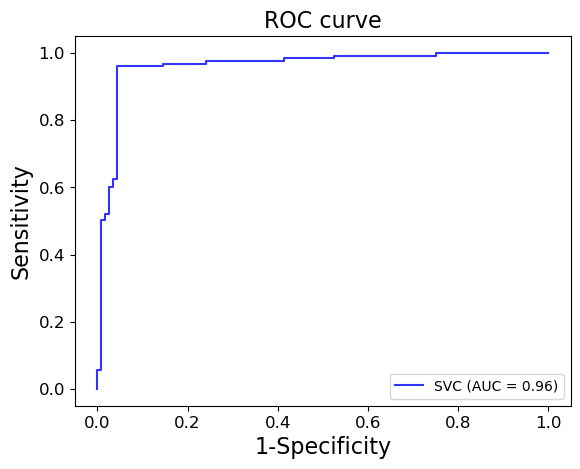

In [44]:
ax = plt.gca()
model_disp = plot_roc_curve(model, x_test, y_test, ax=ax, alpha=0.8, color='blue')
plt.xlabel('1-Specificity', fontsize=16)
plt.ylabel('Sensitivity', fontsize=16)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title('ROC curve', fontsize=16)
plt.show()

In [17]:
from sklearn import metrics

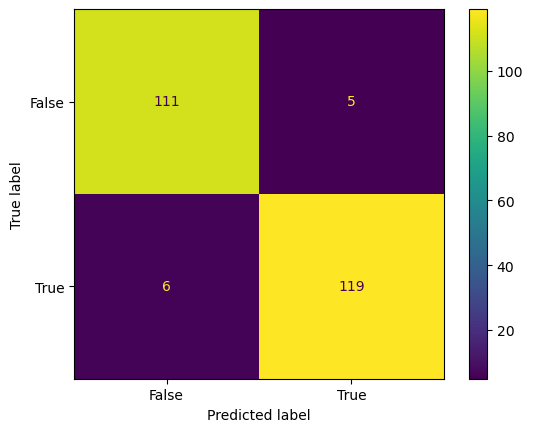

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [19]:
 from sklearn.metrics import classification_report

In [20]:
Accuracy = metrics.accuracy_score(y_test, prediction)
Accuracy

0.9543568464730291

In [32]:
Precision = metrics.precision_score(y_test, prediction)
Precision

0.9596774193548387

In [33]:
Sensitivity_recall = metrics.recall_score(y_test, prediction)
Sensitivity_recall

0.952

In [34]:
Specificity = metrics.recall_score(y_test, prediction)
Specificity

0.952

In [35]:
F1_score = metrics.f1_score(y_test, prediction)
F1_score

0.9558232931726908

In [36]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


{'Accuracy': 0.9543568464730291, 'Precision': 0.9596774193548387, 'Sensitivity_recall': 0.952, 'Specificity': 0.952, 'F1_score': 0.9558232931726908}


In [21]:
final = pd.read_csv("data.csv")

In [22]:
final.head()

,POINTID,GRID_CODE,long,Lat,SPI,Soil_,Slope,Rainfall1,NDVI,lulc_,...,Flow_acc,DR_final,dem,DD_final,Curvature,CN,Aspect,TWI,STI,prob2
0,1,351.027374,76.608695,9.846932,-1.50632,1,6.26637,3654.147839,0.378255,3,...,2,2,69,0.0,-0.422841,79,308.9910,6.73376,0.000000,0.623230
1,2,219.289413,76.612159,9.846916,-0.43119,1,17.93710,3654.147839,0.389830,3,...,2,2,67,0.0,-0.634261,75,218.8840,5.65265,0.209360,0.313419
2,3,319.398712,76.615623,9.846899,-10.42310,1,1.64610,3654.147839,0.389206,3,...,0,6,85,0.0,0.211420,70,351.8700,6.97565,0.000000,0.031128
3,4,14.420774,76.619088,9.846883,0.00000,1,0.00000,3654.147839,0.376153,2,...,1,6,102,0.0,0.105710,75,0.0000,0.00000,0.000000,0.062924
4,5,37.874985,76.487425,9.844052,-2.05469,1,3.60682,3566.107163,0.348509,2,...,2,6,16,0.0,-0.422841,73,61.7826,7.28880,0.001712,0.714163


In [23]:
final.columns

Index(['POINTID', 'GRID_CODE', 'long', 'Lat', 'SPI', 'Soil_', 'Slope',
       'Rainfall1', 'NDVI', 'lulc_', 'Geomorphol', 'Geology_', 'Flow_acc',
       'DR_final', 'dem', 'DD_final', 'Curvature', 'CN', 'Aspect', 'TWI',
       'STI', 'prob2'],
      dtype='object')

In [24]:
data = final[['Soil_','Slope', 'Rainfall1', 'NDVI', 'lulc_', 'Geomorphol', 'Geology_',
       'Flow_acc', 'DR_final', 'dem', 'DD_final', 'Curvature', 'CN', 'Aspect',
       'TWI', 'STI', 'SPI']]

In [25]:
data.head()

,Soil_,Slope,Rainfall1,NDVI,lulc_,Geomorphol,Geology_,Flow_acc,DR_final,dem,DD_final,Curvature,CN,Aspect,TWI,STI,SPI
0,1,6.26637,3654.147839,0.378255,3,1,1,2,2,69,0.0,-0.422841,79,308.9910,6.73376,0.000000,-1.50632
1,1,17.93710,3654.147839,0.389830,3,1,1,2,2,67,0.0,-0.634261,75,218.8840,5.65265,0.209360,-0.43119
2,1,1.64610,3654.147839,0.389206,3,1,1,0,6,85,0.0,0.211420,70,351.8700,6.97565,0.000000,-10.42310
3,1,0.00000,3654.147839,0.376153,2,1,1,1,6,102,0.0,0.105710,75,0.0000,0.00000,0.000000,0.00000
4,1,3.60682,3566.107163,0.348509,2,1,1,2,6,16,0.0,-0.422841,73,61.7826,7.28880,0.001712,-2.05469


In [26]:
scale = StandardScaler()
x_s = scale.fit_transform(data) 
print(x_s)

[[-0.74224981 -0.11691126  1.06335154 ... -0.32511766 -0.07234691
   0.53249071]
 [-0.74224981  1.49895893  1.06335154 ... -0.72044904 -0.04394281
   0.77308873]
 [-0.74224981 -0.75661045  1.06335154 ... -0.23666532 -0.07234691
  -1.46295137]
 ...
 [ 0.60024055  0.89706762 -2.97182015 ... -1.0154145  -0.07234691
  -0.99309675]
 [ 0.60024055  1.91451757 -2.97182015 ... -0.47177397 -0.04064831
   1.05618779]
 [ 0.60024055  3.30100531 -2.97182015 ... -0.84074408 -0.07234691
   1.00146809]]


In [27]:
predict = model.predict(x_s)

In [28]:
prob=model.predict_proba(x_s)
prob

array([[0.34596374, 0.65403626],
       [0.60619674, 0.39380326],
       [0.97156286, 0.02843714],
       ...,
       [0.97208776, 0.02791224],
       [0.9694779 , 0.0305221 ],
       [0.92511371, 0.07488629]])

In [29]:
import pandas as pd

In [30]:
DF = pd.DataFrame(prob)
DF

,0,1
0,0.345964,0.654036
1,0.606197,0.393803
2,0.971563,0.028437
3,0.963196,0.036804
4,0.979642,0.020358
...,...,...
14544,0.801195,0.198805
14545,0.968604,0.031396
14546,0.972088,0.027912
14547,0.969478,0.030522


In [31]:
DF.to_csv("probsvm.csv")